# Importing Metadataspace Imaging MS into IDR

This notebook is a prototype for:
- retrieving images from Metaspace using the sm-analytics-python API
- exporting the images in an OME-TIFF format

In [1]:
!pip install -U git+https://github.com/METASPACE2020/sm-analytics-python@rel-v0.7
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from sm_annotation_utils.sm_annotation_utils import SMInstance

  Cloning https://github.com/METASPACE2020/sm-analytics-python (to rel-v0.7) to /tmp/pip-r6agjai4-build
Requirement already up-to-date: elasticsearch==2.3.0 in /opt/conda/lib/python3.5/site-packages (from sm-annotation-utils==0.1.0)
Requirement already up-to-date: elasticsearch_dsl==2.2.0 in /opt/conda/lib/python3.5/site-packages (from sm-annotation-utils==0.1.0)
Requirement already up-to-date: pandas in /opt/conda/lib/python3.5/site-packages (from sm-annotation-utils==0.1.0)
Requirement already up-to-date: plotly>=1.12 in /opt/conda/lib/python3.5/site-packages (from sm-annotation-utils==0.1.0)
Requirement already up-to-date: numpy in /opt/conda/lib/python3.5/site-packages (from sm-annotation-utils==0.1.0)
Requirement already up-to-date: pyyaml in /opt/conda/lib/python3.5/site-packages (from sm-annotation-utils==0.1.0)
Requirement already up-to-date: psycopg2 in /opt/conda/lib/python3.5/site-packages (from sm-annotation-utils==0.1.0)
Requirement already up-to-date: pyMSpec in /opt/cond

This notebook illustrates how to pull ion images for annotations from the [METASPACE platform](annotate.metaspace2020.eu). It will obtain and display all the isotope images for a set of annotations

In [2]:
# Choose the dataset name to get isotope images for
ds_name = 'WB_tumor_zoom_08042015_dosed'

In [3]:
sm = SMInstance()
d = sm.dataset(ds_name)
results = sm.msm_scores([d], d.annotations()).T.sort_values(by=ds_name, ascending=False)
results.head()

ConnectionError: HTTPConnectionPool(host='annotate.metaspace2020.eu', port=3010): Max retries exceeded with url: /graphql (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f03a932b710>: Failed to establish a new connection: [Errno 110] Connection timed out',))

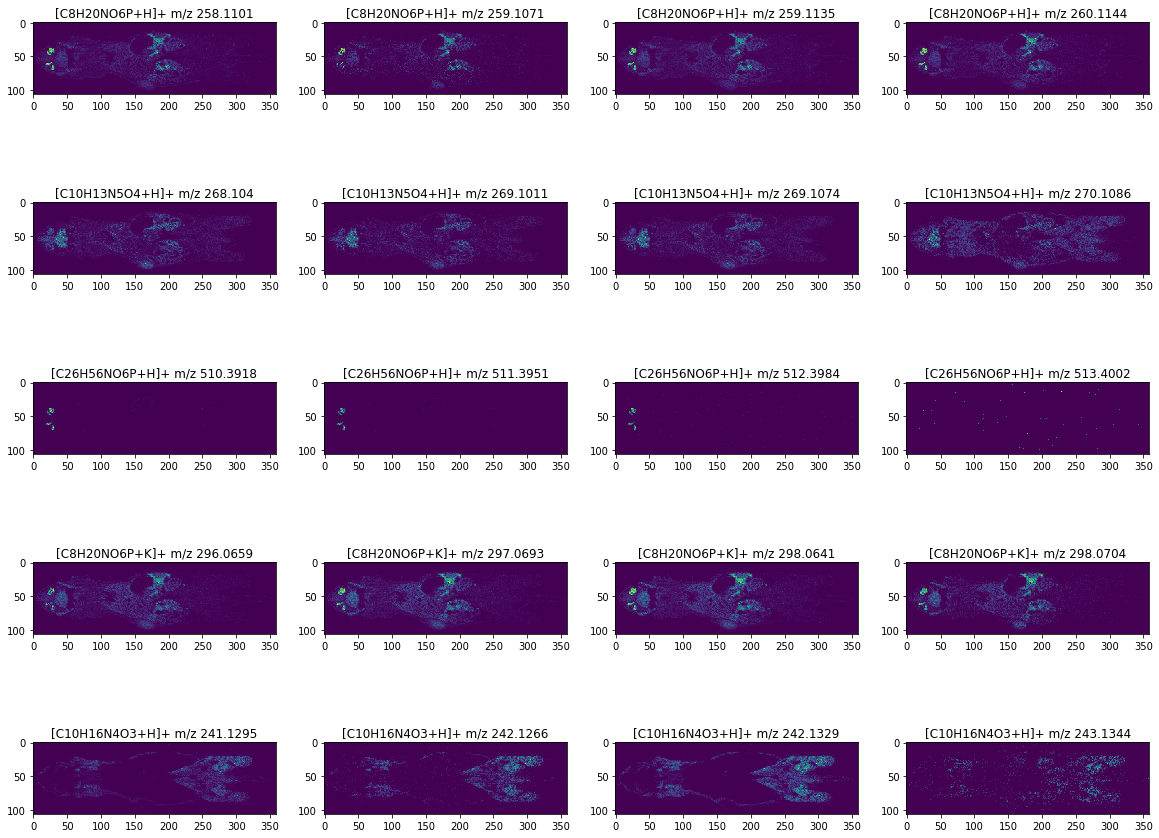

In [6]:
limit = 5 # number of annotations to get
plt.figure(figsize=(20, 16))
for ii in range(limit):
    row = results.iloc[ii]
    (sf, adduct) = row.name
    images = d.isotope_images(sf, adduct)
    for j, im in enumerate(images):
        plt.subplot(limit, 4, ii * 4 + j + 1)
        plt.title("[{}{}]+ m/z {}".format(sf, adduct, images.peak(index=j)))
        plt.imshow(images[j], cmap='viridis')
plt.show()

## Export into OME-TIFF

@@TODO: use python-bioformats to write the images as OME-TIFF

In [22]:
!pip install python-bioformats
import javabridge
import bioformats
javabridge.start_vm(class_path=bioformats.JARS)

path = "output.ome.tiff"

row = results.iloc[0]
(sf, adduct) = row.name
images = d.isotope_images(sf, adduct)
for j, im in enumerate(images):
    print(len(images))
    print(type(images[j]))
    bioformats.formatwriter.write_image(path, images[j], "uint8", c=j, size_c=len(images))

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
4
<class 'numpy.ndarray'>
4
<class 'numpy.ndarray'>
4
<class 'numpy.ndarray'>
4
<class 'numpy.ndarray'>
